In [16]:
%matplotlib ipympl
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# JSON files -> lists of dictionaries
with open('./ui_all_q_p.json') as json_file:
    ui_all_q_p = json.load(json_file)
    
with open('./ui_all_q.json') as json_file:
    ui_all_q = json.load(json_file)

In [17]:
# [{}] -> [[]] 

ui_data = []

for d in ui_all_q_p:   
    for x,y in d.items() :
        name = x
        f1_mean = y['f1_mean']
        roc_mean = y['roc_mean']
        precision_mean = y['precision_mean']
        recall_mean = y['recall_mean']
        ui_data.append(['ui_all_q_p', name,f1_mean, roc_mean, precision_mean, recall_mean])

for d in ui_all_q:   
    for x,y in d.items() :
        name = x
        f1_mean = y['f1_mean']
        roc_mean = y['roc_mean']
        precision_mean = y['precision_mean']
        recall_mean = y['recall_mean']
        ui_data.append(['ui_all_q', name,f1_mean, roc_mean, precision_mean, recall_mean])

In [18]:
# [[]] -> dataframe
df_ui_data = pd.DataFrame(ui_data, columns=['QuestionSet', 'Model', 'f1', 'roc_auc', 'precision', 'recall'])

In [19]:
df_ui_data['precision'].describe()

count    126.000000
mean       0.151988
std        0.093301
min        0.000000
25%        0.100000
50%        0.147436
75%        0.219846
max        0.383983
Name: precision, dtype: float64

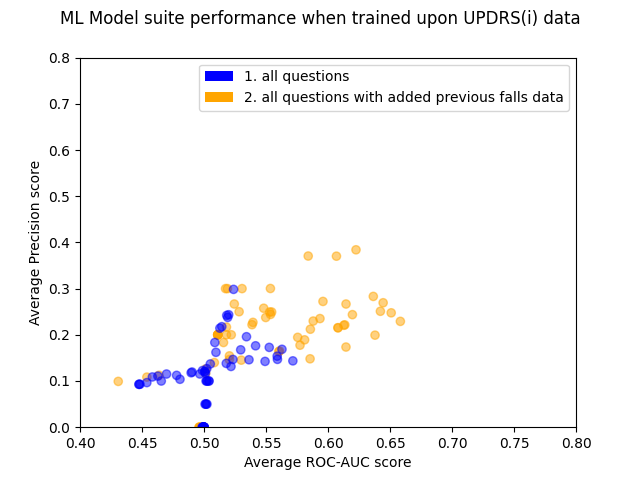

In [37]:
# UPDRS I plot

colors = {'ui_all_q':'blue', 'ui_all_q_p':'orange'}

fig = plt.figure()
ax = fig.add_subplot(111)
# ax2 = fig.add_subplot(122)

# plot 1
# ax.set_title("ROC_AUC scores vs Precision scores")
ax.scatter(df_ui_data['roc_auc'], df_ui_data['precision'], c=df_ui_data['QuestionSet'].map(colors), label=['ui_all_q','ui_all_q_p'], alpha=0.5)
ax.set_xlim([0.4,0.8])
ax.set_ylim([0,0.8])
plt.ylabel("Average Precision score")
plt.xlabel("Average ROC-AUC score")

classes = ['1. all questions','2. all questions with added previous falls data']
class_colours = ['blue','orange']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
ax.legend(recs,classes,loc=1)

# plot 2
# ax2.set_title("Precision scores vs Recall scores")
# ax2.scatter(df_ui_data['precision'], df_ui_data['recall'], c=df_ui_data['QuestionSet'].map(colors))
# ax2.set_xlim([0,1])
# ax2.set_ylim([0,1])



plt.suptitle("ML Model suite performance when trained upon UPDRS(i) data")
plt.show()

In [25]:
df_ui_data.query("roc_auc > 0.6 and precision > 0.3")
# x = df_ui_data.sort_values('precision', ascending=False)
# x.head(n=20)
# General Observations for UPDRS I:
# Nothing worth getting excited about
# + PREV_SIGFALL out performs w/o


QuestionSet Model        f1   roc_auc  precision    recall
11  ui_all_q_p  LDA3  0.337939  0.622582   0.383983  0.322222
14  ui_all_q_p  LDA9  0.311403  0.606808   0.370198  0.287500